# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [3]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe **   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [4]:
(A1, b1) = main.random_matrix_Ab(10)
(A2, b2) = main.random_matrix_Ab(20)
(A3, b3) = main.random_matrix_Ab(50)
(A4, b4) = main.random_matrix_Ab(100)
(A5, b5) = main.random_matrix_Ab(1000)
print(A1)
print(b1)

[[19 71 37 26 79  7 54 54 40 12]
 [75 96 35 49 37 12 30 16 37 80]
 [81 57 89 42 65 58 74 54 19 11]
 [48 89 44 98 31 27 19 31 89 92]
 [99 81 33 38 57 35 70 88 60 12]
 [17 72 72 63 63 18 53 21 55 47]
 [97 69 86 54 43  0 87 20 32 92]
 [80 27 70 95  7 36 25 27 80 75]
 [80  5 36 46 50 46 66 25 15 71]
 [20  5 70 62 58 60 50 71 13 79]]
[35 44 57 87 67 29  9 48 73 34]


***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

Text(0.5, 1.0, 'Uwarunkowanie')

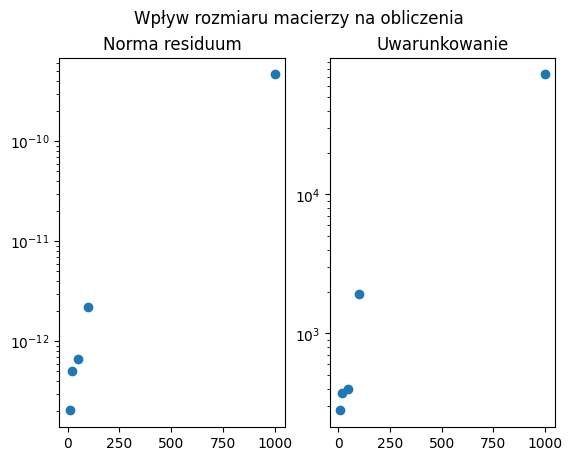

In [5]:
xaxis = [10, 20, 50 , 100, 1000]

x1 = np.linalg.solve(A1, b1)
x2 = np.linalg.solve(A2, b2)
x3 = np.linalg.solve(A3, b3)
x4 = np.linalg.solve(A4, b4)
x5 = np.linalg.solve(A5, b5)
solutions = [x1, x2, x3, x4, x5]
# print(solutions)

norm1 = main.residual_norm(A1, x1, b1)
norm2 = main.residual_norm(A2, x2, b2)
norm3 = main.residual_norm(A3, x3, b3)
norm4 = main.residual_norm(A4, x4, b4)
norm5 = main.residual_norm(A5, x5, b5)
norms = [norm1, norm2, norm3, norm4, norm5]
# print(norms)

cond1 = np.linalg.cond(A1)    
cond2 = np.linalg.cond(A2)    
cond3 = np.linalg.cond(A3)    
cond4 = np.linalg.cond(A4)    
cond5 = np.linalg.cond(A5)    
conds = [cond1, cond2, cond3, cond4, cond5]
# print(conds)


plt.suptitle('Wpływ rozmiaru macierzy na obliczenia')
plt.subplot(1, 2, 1)
plt.plot(xaxis, norms, 'o')
plt.yscale('log')
plt.title('Norma residuum')

plt.subplot(1, 2, 2)
plt.plot(xaxis, conds, 'o')
plt.yscale('log')
plt.title('Uwarunkowanie')

# s_norm.set(yscale='log', xlabel='Rozmiar macierzy', ylabel='Norma residuum')
# s_norm.set_title('Norma residuum')

# s_cond.plot(m, cond_results, 'mo')
# s_cond.set(yscale='log', xlabel='Rozmiar macierzy', ylabel='Uwarunkowanie macierzy')
# s_cond.set_title('Uwarunkowanie');

In [6]:
times = []
time_averages = []
for i in xaxis:
    print(f"Czas stworzenia i rozwiązania macierzy o rozmiarze {i}: ")
    now = main.random_matrix_Ab(10)
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.solve(now[0] , now[1] )
    time_averages.append(saved_timing.average)
    times.append(saved_timing.stdev)

Czas stworzenia i rozwiązania macierzy o rozmiarze 10: 
9.49 µs ± 1.96 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i rozwiązania macierzy o rozmiarze 20: 
9.66 µs ± 1.14 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i rozwiązania macierzy o rozmiarze 50: 
10.1 µs ± 1.43 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i rozwiązania macierzy o rozmiarze 100: 
9.3 µs ± 1.06 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i rozwiązania macierzy o rozmiarze 1000: 
9.2 µs ± 927 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [7]:
times = []
time_averages = []
for i in xaxis:
    print(f"Czas stworzenia i obliczenia normy macierzy o rozmiarze {i}: ")
    now = main.random_matrix_Ab(10)
    saved_timing = %timeit -r 5 -n 10 -o main.residual_norm(now[0], np.linalg.solve(now[0], now[1]), now[1])
    time_averages.append(saved_timing.average)
    times.append(saved_timing.stdev)

Czas stworzenia i obliczenia normy macierzy o rozmiarze 10: 
18.5 µs ± 3.89 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia normy macierzy o rozmiarze 20: 
15.4 µs ± 1.89 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia normy macierzy o rozmiarze 50: 
15.4 µs ± 1.53 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia normy macierzy o rozmiarze 100: 
15.4 µs ± 1.46 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia normy macierzy o rozmiarze 1000: 
15.7 µs ± 1.22 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [8]:
times = []
time_averages = []
for i in xaxis:
    print(f"Czas stworzenia i obliczenia uwarunkowania macierzy o rozmiarze {i}: ")
    now = main.random_matrix_Ab(10)
    saved_timing = %timeit -r 5 -n 10 -o np.linalg.cond(now[0])
    time_averages.append(saved_timing.average)
    times.append(saved_timing.stdev)

Czas stworzenia i obliczenia uwarunkowania macierzy o rozmiarze 10: 
33.4 µs ± 4.25 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia uwarunkowania macierzy o rozmiarze 20: 
32.1 µs ± 2.35 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia uwarunkowania macierzy o rozmiarze 50: 
31.8 µs ± 2.02 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia uwarunkowania macierzy o rozmiarze 100: 
29.7 µs ± 2.29 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas stworzenia i obliczenia uwarunkowania macierzy o rozmiarze 1000: 
29.8 µs ± 2.11 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [9]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [10]:
S1 = np.logspace(100, 1, num=3)

- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [11]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [12]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [13]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A) 

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[-4.02045290e+99  3.94198798e+99  5.91298198e+99]
 [ 9.14289726e+99  1.91685719e+99  2.87528579e+99]
 [-4.93343857e+98  3.39935582e+99  5.09903374e+99]]




3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




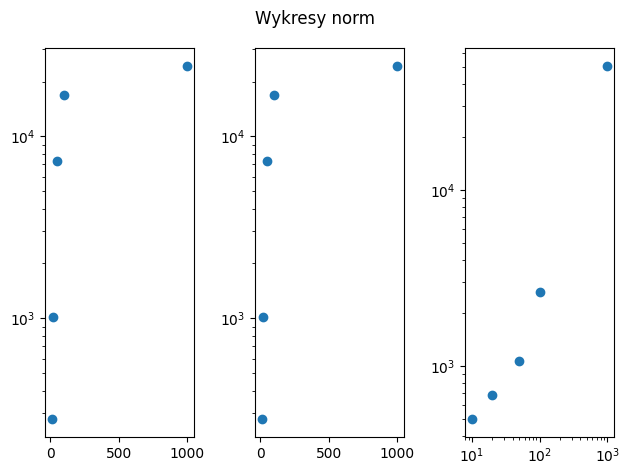

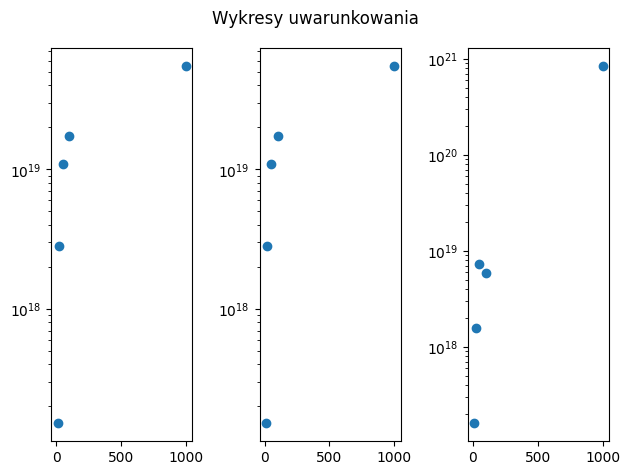

In [31]:
norms1 = []
norms2 = []
norms3 = []
conds1 = []
conds2 = []
conds3 = []

for i in xaxis:
   S1 = np.logspace(100, 1, num=i)
   S2 = np.logspace(100, 1, num=i)
   S2[0] = S2[0]+100
   S3 = np.logspace(100, 1, num=i)
   S3[-1] = S3[0]-100
   (A, b) = main.random_matrix_Ab(i)
   mat1 = main.create_matrix_from_A(A, S1)
   mat2 = main.create_matrix_from_A(A, S2)
   mat3 = main.create_matrix_from_A(A, S3)
   
   conds1.append(np.linalg.cond(mat1))
   conds2.append(np.linalg.cond(mat2))
   conds3.append(np.linalg.cond(mat3))

   norms1.append(main.residual_norm(mat1, np.linalg.solve(mat1, b), b))
   norms2.append(main.residual_norm(mat2, np.linalg.solve(mat2, b), b))
   norms3.append(main.residual_norm(mat3, np.linalg.solve(mat3, b), b))



plt.suptitle('Wykresy norm')
plt.subplot(1, 3, 1)
plt.semilogy(xaxis, norms1, 'o')
plt.subplot(1, 3, 2)
plt.semilogy(xaxis, norms2, 'o')
plt.subplot(1, 3, 3)
plt.semilogy(xaxis, norms3, 'o')
plt.tight_layout()

plt.figure()

plt.suptitle('Wykresy uwarunkowania')
plt.subplot(1, 3, 1)
plt.semilogy(xaxis, conds1, 'o')
plt.subplot(1, 3, 2)
plt.semilogy(xaxis, conds2, 'o')
plt.subplot(1, 3, 3)
plt.semilogy(xaxis, conds3, 'o')
plt.tight_layout()



Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)